In [11]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns


In [2]:
res = pd.read_csv('supermarket_sales.csv')

In [4]:
print(res.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [5]:
product_sales = res.groupby('Product line')['Total'].sum().reset_index()

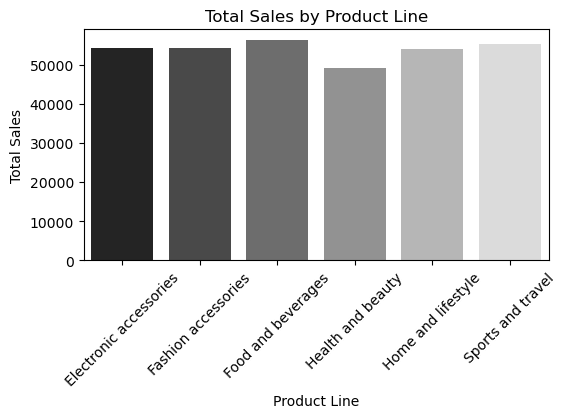

In [12]:
plot.figure(figsize=(6, 3))
sns.barplot(x='Product line', y='Total', data=product_sales, palette='gray')
plot.title('Total Sales by Product Line')
plot.xlabel('Product Line')
plot.ylabel('Total Sales')
plot.xticks(rotation=45)
plot.show()

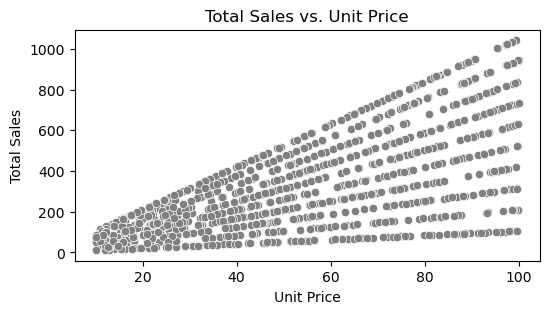

In [15]:
plot.figure(figsize=(6, 3))
sns.scatterplot(x='Unit price', y='Total', data=res, color='gray')
plot.title('Total Sales vs. Unit Price')
plot.xlabel('Unit Price')
plot.ylabel('Total Sales')
plot.show()

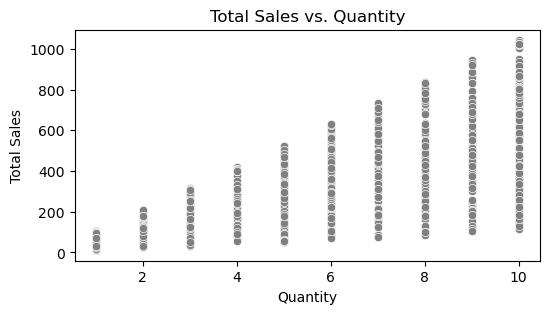

In [17]:
plot.figure(figsize=(6, 3))
sns.scatterplot(x='Quantity', y='Total', data=res, color='gray')
plot.title('Total Sales vs. Quantity')
plot.xlabel('Quantity')
plot.ylabel('Total Sales')
plot.show()

In [18]:
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [26]:
res['Customer type'] = res['Customer type'].map({'Member': 1, 'Normal': 0})  # Convert to binary
res['Gender'] = res['Gender'].map({'Male': 1, 'Female': 0})

# Select features and target
X = res[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']]
y = res['Customer type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model (using Random Forest as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Normal', 'Member']).plot(cmap='Blues')

# Show the plot
plot.title('Confusion Matrix for Customer Type Prediction')
plot.show()

ValueError: Input y contains NaN.

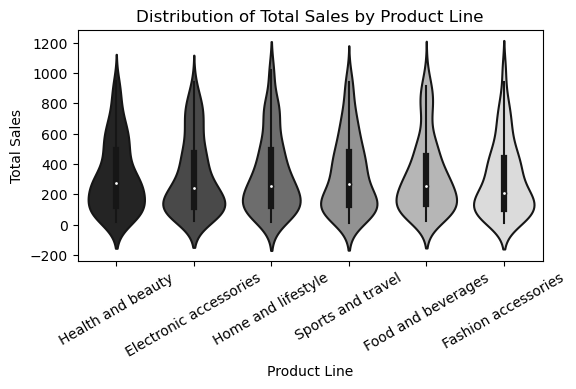

In [29]:
plot.figure(figsize=(6, 3))
sns.violinplot(x='Product line', y='Total', data=res, palette='gray')
plot.title('Distribution of Total Sales by Product Line')
plot.xlabel('Product Line')
plot.ylabel('Total Sales')
plot.xticks(rotation=30) 
plot.show()

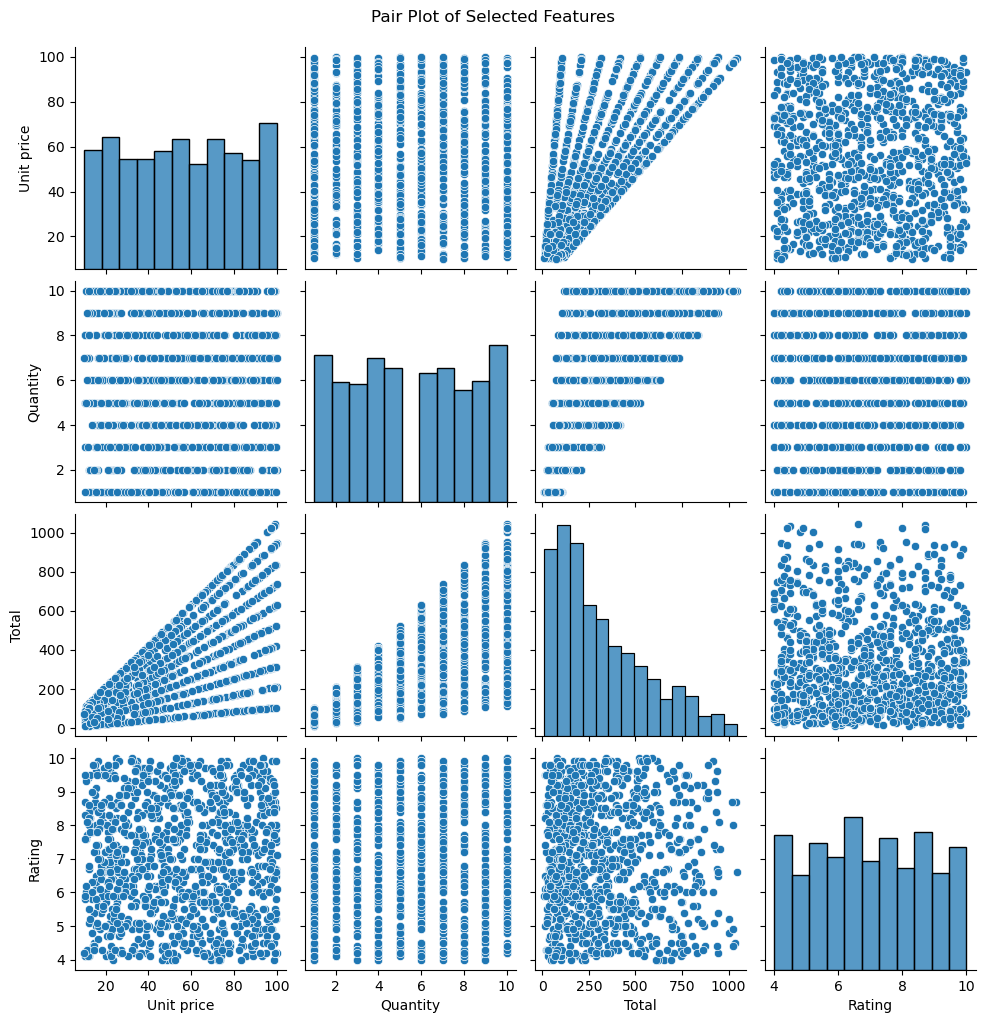

In [30]:
selected_columns = res[['Unit price', 'Quantity', 'Total', 'Rating']]

# Create the pair plot
sns.pairplot(selected_columns)
plot.suptitle('Pair Plot of Selected Features', y=1.02)
plot.show()

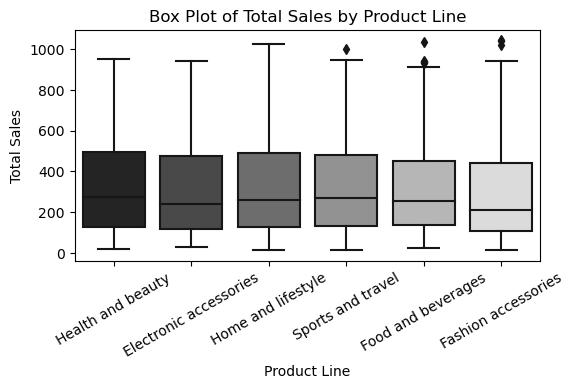

In [32]:
plot.figure(figsize=(6, 3))
sns.boxplot(x='Product line', y='Total', data=res, palette='gray')
plot.title('Box Plot of Total Sales by Product Line')
plot.xlabel('Product Line')
plot.ylabel('Total Sales')
plot.xticks(rotation=30) 
plot.show()